Student Details

Name: Fergus Mc Hale

ID: 18203485

You may add two extra libraries: one to make a train-test split and one to perform a grid search

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
import math

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import pandas as pd

In [2]:
TARGET_ATTRIBUTE = '2'

# Dataset 1

In [3]:
dataset_1 = pd.read_csv("./dataset_1.csv",index_col=0)

In [4]:
y1 = dataset_1[TARGET_ATTRIBUTE].values

X1 = dataset_1.drop(TARGET_ATTRIBUTE, axis=1).values
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2)

# Dataset 2

In [5]:
dataset_2 = pd.read_csv("./dataset_2.csv",index_col=0)

In [6]:
y2 = dataset_2[TARGET_ATTRIBUTE].values

# predictor attributes
X2 = dataset_2.drop(TARGET_ATTRIBUTE, axis=1).values
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=0)

# DataSet 3

In [7]:
dataset_3 = pd.read_csv("./dataset_3.csv",index_col=0)

In [8]:
y3 = dataset_3[TARGET_ATTRIBUTE].values

# predictor attributes
X3 = dataset_3.drop(TARGET_ATTRIBUTE, axis=1).values
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=0)

In [9]:
classifer_c01 = GridSearchCV(svm.SVC(), {'kernel': ['linear'], 'C': [.01]}, scoring='accuracy',cv=10, n_jobs=-1)
classifer_c1 = GridSearchCV(svm.SVC(), {'kernel': ['linear'], 'C': [1]}, scoring='accuracy',cv=10, n_jobs=-1)
classifer_c10 = GridSearchCV(svm.SVC(), {'kernel': ['linear'], 'C': [10]}, scoring='accuracy',cv=10, n_jobs=-1)
classifer_c100 = GridSearchCV(svm.SVC(), {'kernel': ['linear'], 'C': [100]}, scoring='accuracy',cv=10, n_jobs=-1)

classifer_c01.fit(X1_train, y1_train)
classifer_c1.fit(X1_train, y1_train)
classifer_c10.fit(X1_train, y1_train)
classifer_c100.fit(X1_train, y1_train)

classifiers = [(classifer_c01, 'C = .01'),
               (classifer_c1, 'C = 1'),
               (classifer_c10, 'C = 10'),
               (classifer_c100, 'C = 100')]

In [10]:
def get_eout(support_vector_size,number_of_training_samples):
    return support_vector_size/(number_of_training_samples -1)

In [11]:
def plot_classifier(clf, X_train,y_train,title=None):
    # plot the decision function
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=30, cmap=plt.cm.Paired)
    plt.title(title)
    # plot the decision function
    ax = plt.gca()
    ax.set_aspect(aspect=1)
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    # plot support vectors
    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,  linewidth=1, facecolors='none', edgecolors='k')
    print('Total Support Vectors {0}'.format(len(clf.support_vectors_)))
    print('Training Samples {0}'.format(len(X_train)))
    print(clf.support_vectors_)
    expected_eout = get_eout(len(clf.support_vectors_),len(X_train))
    print('E-out {0}'.format(expected_eout))
    plt.show()

# Task 4  (CE6002)
* Perform classification on dataset_1 using an SVM with linear kernel and experiment with the C-parameter to find the widest margin solution with a hard margin and a soft margin.
* This task provides an insight in how SVM’s try to find a hyperplane (which in two dimensions is a line) which divides two classes with the maximum margin on either side of the hyperplane. You can use the C-parameter as a form of regularization; with this parameter you can allow the SVM to miss-classify certain points to allow a wider margin and thus, hopefully, a better performance out-of-sample.

Total Support Vectors 1139
Training Samples 8000
[[-0.56540444 -0.02168279]
 [-0.4413134   0.2936456 ]
 [-0.76681765 -0.34315427]
 ...
 [ 0.08164789  0.08765122]
 [ 0.00446832 -0.11442157]
 [-0.36040086 -0.73816591]]
E-out 0.14239279909988747


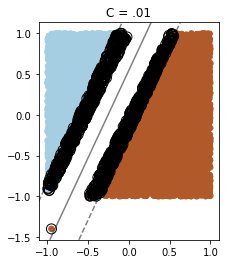

Total Support Vectors 23
Training Samples 8000
[[-0.83928299 -0.67750844]
 [-0.27611848  0.45161241]
 [-0.77387613 -0.54486202]
 [-0.41876949  0.16350114]
 [-0.11395808  0.77610907]
 [-0.34715894  0.30941224]
 [-0.78974925 -0.57527146]
 [-0.93348183 -0.86618848]
 [-0.62230156 -0.24152621]
 [-0.66478518 -0.32579898]
 [-0.02413072  0.95493771]
 [-0.13321589  0.73438384]
 [-0.48112241 -0.96240371]
 [-0.15099686 -0.30310408]
 [-0.16191698 -0.32500711]
 [ 0.31305328  0.62450954]
 [ 0.16721063  0.33260922]
 [ 0.01339543  0.02530265]
 [-0.95       -1.4       ]
 [ 0.01232266  0.02172611]
 [ 0.33605953  0.67044617]
 [-0.28379043 -0.5705029 ]
 [-0.13394844 -0.2682658 ]]
E-out 0.002875359419927491


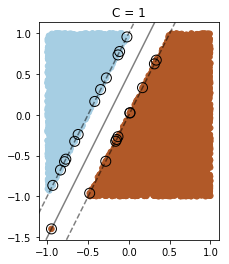

Total Support Vectors 5
Training Samples 8000
[[-0.83928299 -0.67750844]
 [-0.93348183 -0.86618848]
 [ 0.31305328  0.62450954]
 [-0.95       -1.4       ]
 [-0.13394844 -0.2682658 ]]
E-out 0.0006250781347668458


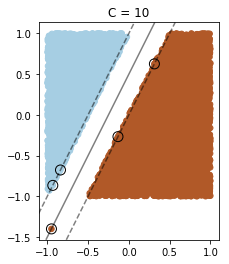

Total Support Vectors 3
Training Samples 8000
[[-0.93348183 -0.86618848]
 [-0.95       -1.4       ]
 [ 0.49142383  0.97375185]]
E-out 0.00037504688086010754


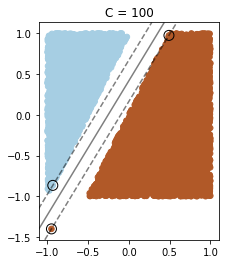

In [12]:
for classifier in classifiers:
    plot_classifier(classifier[0].best_estimator_, X1_train, y1_train,classifier[1])

Total Support Vectors 1139
Training Samples 2001
[[-0.56540444 -0.02168279]
 [-0.4413134   0.2936456 ]
 [-0.76681765 -0.34315427]
 ...
 [ 0.08164789  0.08765122]
 [ 0.00446832 -0.11442157]
 [-0.36040086 -0.73816591]]
E-out 0.5695


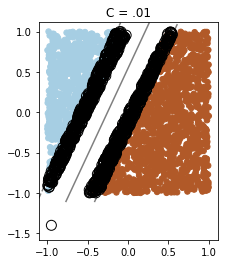

Total Support Vectors 23
Training Samples 2001
[[-0.83928299 -0.67750844]
 [-0.27611848  0.45161241]
 [-0.77387613 -0.54486202]
 [-0.41876949  0.16350114]
 [-0.11395808  0.77610907]
 [-0.34715894  0.30941224]
 [-0.78974925 -0.57527146]
 [-0.93348183 -0.86618848]
 [-0.62230156 -0.24152621]
 [-0.66478518 -0.32579898]
 [-0.02413072  0.95493771]
 [-0.13321589  0.73438384]
 [-0.48112241 -0.96240371]
 [-0.15099686 -0.30310408]
 [-0.16191698 -0.32500711]
 [ 0.31305328  0.62450954]
 [ 0.16721063  0.33260922]
 [ 0.01339543  0.02530265]
 [-0.95       -1.4       ]
 [ 0.01232266  0.02172611]
 [ 0.33605953  0.67044617]
 [-0.28379043 -0.5705029 ]
 [-0.13394844 -0.2682658 ]]
E-out 0.0115


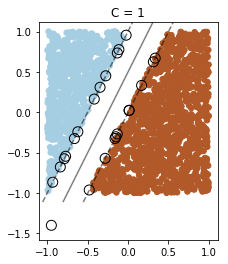

Total Support Vectors 5
Training Samples 2001
[[-0.83928299 -0.67750844]
 [-0.93348183 -0.86618848]
 [ 0.31305328  0.62450954]
 [-0.95       -1.4       ]
 [-0.13394844 -0.2682658 ]]
E-out 0.0025


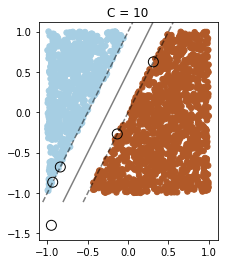

Total Support Vectors 3
Training Samples 2001
[[-0.93348183 -0.86618848]
 [-0.95       -1.4       ]
 [ 0.49142383  0.97375185]]
E-out 0.0015


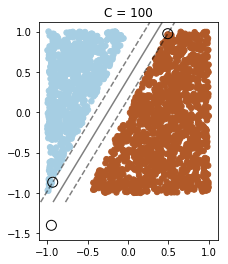

In [13]:
for classifier in classifiers:
    plot_classifier(classifier[0].best_estimator_, X1_test, y1_test,classifier[1])

# Soft Margin

In [14]:
classifer_soft_margin = GridSearchCV(svm.SVC(), {'kernel': ['linear'], 'C': [1]}, scoring='accuracy',cv=5, n_jobs=-1)
classifer_soft_margin.fit(X1_train, y1_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'kernel': ['linear'], 'C': [1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

Total Support Vectors 23
Training Samples 8000
[[-0.83928299 -0.67750844]
 [-0.27611848  0.45161241]
 [-0.77387613 -0.54486202]
 [-0.41876949  0.16350114]
 [-0.11395808  0.77610907]
 [-0.34715894  0.30941224]
 [-0.78974925 -0.57527146]
 [-0.93348183 -0.86618848]
 [-0.62230156 -0.24152621]
 [-0.66478518 -0.32579898]
 [-0.02413072  0.95493771]
 [-0.13321589  0.73438384]
 [-0.48112241 -0.96240371]
 [-0.15099686 -0.30310408]
 [-0.16191698 -0.32500711]
 [ 0.31305328  0.62450954]
 [ 0.16721063  0.33260922]
 [ 0.01339543  0.02530265]
 [-0.95       -1.4       ]
 [ 0.01232266  0.02172611]
 [ 0.33605953  0.67044617]
 [-0.28379043 -0.5705029 ]
 [-0.13394844 -0.2682658 ]]
E-out 0.002875359419927491


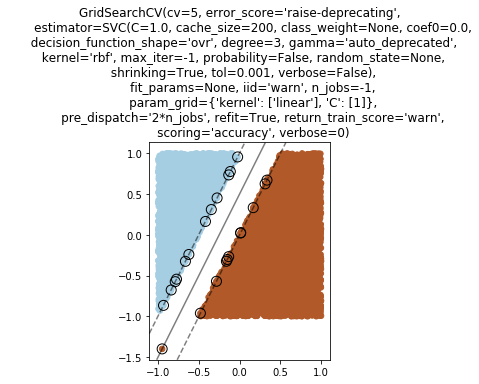

In [15]:
plot_classifier(classifer_soft_margin.best_estimator_, X1_train, y1_train,classifer_soft_margin)

# Hard Margin

In [58]:
classifer_hard_margin = GridSearchCV(svm.SVC(), {'kernel': ['linear'], 'C': [20]}, scoring='accuracy',cv=5, n_jobs=-1)
classifer_hard_margin.fit(X1_train, y1_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'kernel': ['linear'], 'C': [20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

Total Support Vectors 4
Training Samples 8000
[[-0.94542268 -0.87501433]
 [-0.93348183 -0.86618848]
 [-0.95       -1.4       ]
 [ 0.49142383  0.97375185]]
E-out 0.0005000625078134767


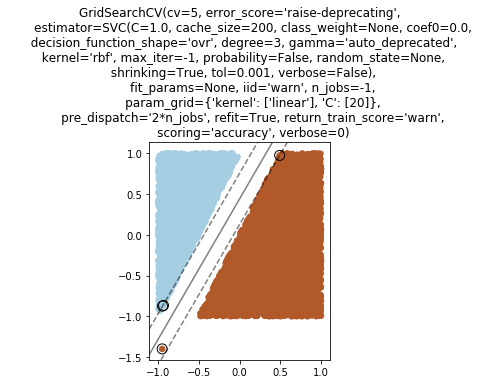

In [59]:
plot_classifier(classifer_hard_margin.best_estimator_, X1_train, y1_train,classifer_hard_margin)

# Task 5  (CE6002)
* Explore the provided data sets (dataset_1, dataset_2 and dataset_3) using Support Vector Machines and choose suitable kernels and hyper-parameters.
* This task provides an insight in how a kernel can allow the SVM (a linear classifier) to be used on non-linearly separable data sets by casting the data in some higher dimensional space as determined by the kernel you choose. In addition to choosing a suitable kernel, you will find that tuning the hyper-parameters of the SVM is important. Take some time to explore various kernels and values of the hyper-parameters to get a feel for how they affect performance and then use a structured approach to arrive at your final conclusions. Take into consideration the out-of-sample error (simulated and based on theory (see lecture 14 from Learning from Data)). 
* For this task you may import two extra libraries: one to create train-test splits and one to perform a grid search of your choosing.

In [18]:
ds1_params = [{'kernel': ['linear'],'C': [1, 10]}]
ds2_params = [
    {'kernel': ['linear'], 'C': [1, 10], },
    {'kernel': ['rbf'],    'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], },
    {'kernel': ['poly'],   'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'degree' :[2,3,4], 'coef0' : [0,1], }
]
ds3_params = {"kernel": ['linear','rbf','sigmoid'], "C": [1, 10, 100] , "gamma": [0.001, 0.0001,1,10,"auto"] }

In [19]:
def grid_search_CV_optimal_svm(X_train,y_train, params):
    clf = GridSearchCV(svm.SVC(), params, scoring='accuracy', cv=10, n_jobs=-1)
    clf.fit(X_train, y_train)
    print("Grid Search : Best SVM classifier parameters:\n", clf.best_params_)
    print("Grid Search :Best CV score :", clf.best_score_)
    return clf    

# Dataset 1

(8000, 2) (8000,)


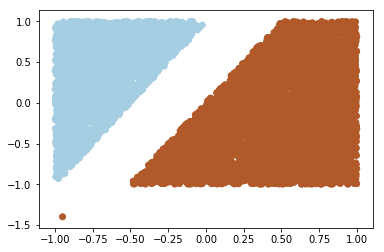

In [20]:
print(X1_train.shape, y1_train.shape)
plt.figure()
plt.scatter(X1_train[:,0], X1_train[:,1], c=y1_train, cmap=plt.cm.Paired)
plt.show()

In [21]:
clf_ds1_train_grid = grid_search_CV_optimal_svm(X1_train,y1_train,ds1_params)

Grid Search : Best SVM classifier parameters:
 {'C': 10, 'kernel': 'linear'}
Grid Search :Best CV score : 1.0


In [22]:
def plot_classifier2(clf, X_train, y_train, title = ''):
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=30, cmap=plt.cm.Paired)
    plt.title(title)
    print(str(clf.best_params_))
    # plot the decision function
    ax = plt.gca()
    ax.set_aspect(aspect=1)
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.best_estimator_.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    # plot support vectors
    ax.scatter(clf.best_estimator_.support_vectors_[:, 0], clf.best_estimator_.support_vectors_[:, 1], s=100,  linewidth=1, facecolors='none', edgecolors='k')
    print('Total Support Vectors {0}'.format(len(clf.best_estimator_.support_vectors_)))
    print('Training Samples {0}'.format(len(X1_train)))
    print(clf.best_estimator_.support_vectors_)
    expected_eout = get_eout(len(clf.best_estimator_.support_vectors_),len(X1_train))
    print('E-out {0}'.format(expected_eout))
    plt.show()

{'C': 10, 'kernel': 'linear'}
Total Support Vectors 5
Training Samples 8000
[[-0.83928299 -0.67750844]
 [-0.93348183 -0.86618848]
 [ 0.31305328  0.62450954]
 [-0.95       -1.4       ]
 [-0.13394844 -0.2682658 ]]
E-out 0.0006250781347668458


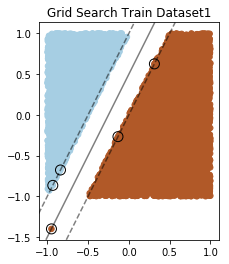

In [23]:
plot_classifier2(clf_ds1_train_grid,X1_train,y1_train,'Grid Search Train Dataset1')

In [25]:
clf_ds1_test_grid = grid_search_CV_optimal_svm(X1_test,y1_test,ds1_params)

Grid Search : Best SVM classifier parameters:
 {'C': 1, 'kernel': 'linear'}
Grid Search :Best CV score : 1.0


{'C': 1, 'kernel': 'linear'}
Total Support Vectors 20
Training Samples 8000
[[-0.98792723 -0.97230995]
 [-0.30302173  0.41269204]
 [-0.62374391 -0.23151806]
 [-0.26191636  0.47782806]
 [-0.27486548  0.45362456]
 [-0.09754037  0.82721676]
 [-0.13294631  0.7579538 ]
 [-0.56925863 -0.13273605]
 [-0.30407569  0.41348949]
 [-0.71806063 -0.42772625]
 [-0.36193869 -0.74102127]
 [ 0.09507932  0.18573743]
 [-0.42962017 -0.87261554]
 [ 0.23727031  0.47271164]
 [-0.16222095 -0.33694404]
 [-0.35594554 -0.72181638]
 [ 0.13268228  0.25556419]
 [ 0.12003331  0.23293166]
 [ 0.26596053  0.53110191]
 [ 0.17921653  0.35492434]]
E-out 0.0025003125390673834


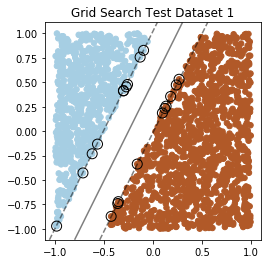

In [26]:
plot_classifier2(clf_ds1_test_grid,X1_test,y1_test,'Grid Search Test Dataset 1')

# Dataset 2

(8000, 2) (8000,)


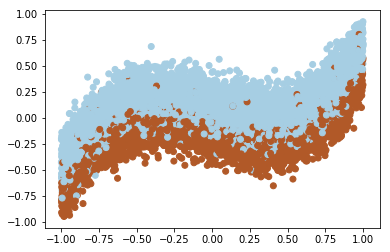

In [27]:
print(X2_train.shape, y2_train.shape)
plt.figure()
plt.scatter(X2_train[:,0], X2_train[:,1], c=y2_train, cmap=plt.cm.Paired)
plt.show()

In [29]:
clf_ds2_train_grid = grid_search_CV_optimal_svm(X2_train,y2_train,ds2_params)

Grid Search : Best SVM classifier parameters:
 {'C': 1000, 'coef0': 1, 'degree': 2, 'gamma': 0.001, 'kernel': 'poly'}
Grid Search :Best CV score : 0.780625


{'C': 1000, 'coef0': 1, 'degree': 2, 'gamma': 0.001, 'kernel': 'poly'}
Total Support Vectors 4118
Training Samples 8000
[[-0.90519703 -0.36406262]
 [ 0.37943343 -0.02150247]
 [ 0.33597993 -0.02760414]
 ...
 [-0.38338885 -0.04712923]
 [-0.74547482 -0.11228036]
 [-0.62317698 -0.27572716]]
E-out 0.5148143517939743


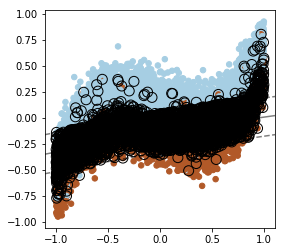

In [30]:
plot_classifier2(clf_ds2_train_grid,X2_train,y2_train)

In [32]:
clf_ds2_test_grid = grid_search_CV_optimal_svm(X2_test,y2_test,ds2_params)

Grid Search : Best SVM classifier parameters:
 {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
Grid Search :Best CV score : 0.778


{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
Total Support Vectors 1137
Training Samples 8000
[[ 0.44643713 -0.10897993]
 [ 0.75304688  0.08108139]
 [ 0.57396246  0.07087827]
 ...
 [-0.17693336 -0.06902673]
 [-0.15567215 -0.17846474]
 [-0.65936344 -0.22538064]]
E-out 0.14214276784598076


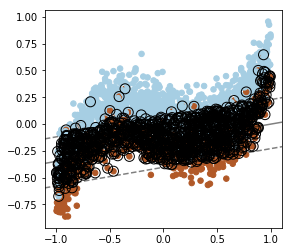

In [33]:
plot_classifier2(clf_ds2_test_grid,X2_test,y2_test)

# Dataset 3

(8000, 2) (8000,)


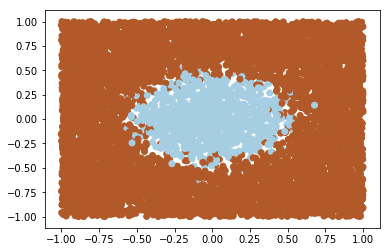

In [34]:
print(X3_train.shape, y3_train.shape)
plt.figure()
plt.scatter(X3_train[:,0], X3_train[:,1], c=y3_train, cmap=plt.cm.Paired)
plt.show()

In [35]:
ds3_params = {'kernel': ['poly'],'C': [1,10], 'degree':[2,3,4]}

In [36]:
clf_ds3_train_grid = grid_search_CV_optimal_svm(X3_train,y3_train,ds3_params)

Grid Search : Best SVM classifier parameters:
 {'C': 10, 'degree': 2, 'kernel': 'poly'}
Grid Search :Best CV score : 0.98725


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


{'C': 10, 'degree': 2, 'kernel': 'poly'}
Total Support Vectors 416
Training Samples 8000
[[-1.47360765e-01  3.70230496e-01]
 [-2.02272027e-01 -3.62237813e-01]
 [ 1.62630193e-01 -3.48730854e-01]
 [-3.95167795e-01 -2.37295125e-01]
 [ 2.65037105e-01  2.95272175e-01]
 [-2.82461264e-01 -4.91401458e-01]
 [-4.28567382e-01  5.04367736e-02]
 [-1.78512415e-01  4.03407433e-01]
 [ 4.29883882e-01  1.70922151e-01]
 [ 4.10674463e-01 -1.21799868e-02]
 [ 2.38919273e-01  3.44352520e-01]
 [-5.57980199e-02 -4.48298885e-01]
 [ 2.96206992e-01 -3.23305302e-01]
 [-1.57442826e-01 -3.47535812e-01]
 [-3.03547622e-01  3.18921559e-01]
 [-4.42994888e-01  7.73438962e-02]
 [-5.02877442e-01  1.11986757e-01]
 [ 5.19693137e-01 -9.56628445e-03]
 [ 5.21905703e-01 -1.02374622e-01]
 [-1.79073046e-01 -4.31433271e-01]
 [ 3.13697012e-01  3.93869625e-01]
 [ 4.94279571e-01 -5.55747033e-02]
 [ 1.68925037e-01  3.53932887e-01]
 [ 1.18637461e-01 -3.98751367e-01]
 [ 4.46949304e-02  3.92229648e-01]
 [-8.76032563e-02  4.78553530e-01]
 

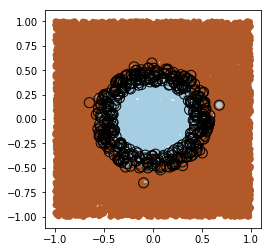

In [37]:
plot_classifier2(clf_ds3_train_grid,X3_train,y3_train)

In [39]:
clf_ds3_test_grid = grid_search_CV_optimal_svm(X3_test,y3_test,ds3_params)

Grid Search : Best SVM classifier parameters:
 {'C': 10, 'degree': 2, 'kernel': 'poly'}
Grid Search :Best CV score : 0.989


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


{'C': 10, 'degree': 2, 'kernel': 'poly'}
Total Support Vectors 151
Training Samples 8000
[[ 0.03792597 -0.37718649]
 [-0.38175272 -0.04937899]
 [ 0.09186315 -0.3357181 ]
 [ 0.36335469 -0.2051127 ]
 [ 0.1897281   0.31184945]
 [ 0.42567936  0.19370804]
 [ 0.16785146  0.37743853]
 [-0.43409237 -0.03825495]
 [-0.06689438 -0.46938714]
 [ 0.16167535 -0.32416269]
 [ 0.30001938  0.29559316]
 [ 0.26024579  0.28149121]
 [ 0.37423132 -0.22113348]
 [ 0.32051187 -0.52126589]
 [ 0.13181793 -0.31844287]
 [ 0.38763663  0.29082098]
 [ 0.00992627  0.36580026]
 [ 0.04110525  0.38869467]
 [-0.18656451  0.30475795]
 [ 0.25115701  0.3175002 ]
 [-0.31191475 -0.19404767]
 [-0.40452353  0.18089837]
 [ 0.31350937 -0.26972414]
 [-0.09571832  0.35584019]
 [ 0.12700807 -0.40731799]
 [ 0.36761843 -0.12855143]
 [-0.27485939 -0.33621575]
 [ 0.46598327 -0.11540181]
 [ 0.47515229  0.26262791]
 [ 0.33528069  0.20732482]
 [-0.3388753   0.24800222]
 [-0.26612631 -0.39517908]
 [ 0.47013225  0.02386667]
 [ 0.46325003  0.079

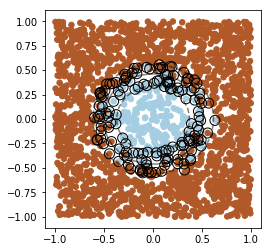

In [40]:
plot_classifier2(clf_ds3_test_grid,X3_test,y3_test)

# Example Dataset

# Linear

In [41]:
X4 = X2[40:55]
print('x4 {0}'.format(X4.shape))
y4 = y3[60:75]
print('y4 {0}'.format(y4.shape))

x4 (15, 2)
y4 (15,)


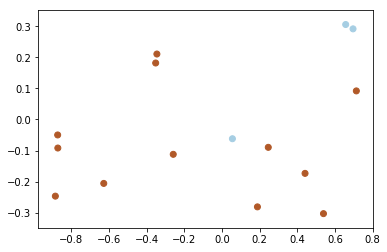

In [42]:
plt.scatter(X4[:, 0], X4[:, 1], c=y4, cmap=plt.cm.Paired)

In [56]:
example_ds_grid = grid_search_CV_optimal_svm(X4,y4,ds2_params)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Grid Search : Best SVM classifier parameters:
 {'C': 1, 'kernel': 'linear'}
Grid Search :Best CV score : 0.8


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'C': 1, 'kernel': 'linear'}
Total Support Vectors 7
Training Samples 8000
[[ 0.69550373  0.2922365 ]
 [ 0.05519511 -0.06203245]
 [ 0.65652575  0.30619456]
 [-0.34578319  0.21107692]
 [ 0.44076216 -0.17375055]
 [ 0.24554636 -0.08977554]
 [ 0.71309497  0.0921555 ]]
E-out 0.0008751093886735842


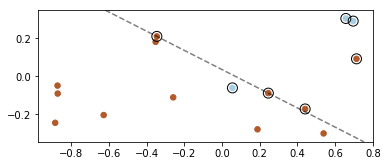

In [57]:
plot_classifier2(example_ds_grid,X4,y4)

# RBF

In [67]:
rbfkernal = GridSearchCV(svm.SVC(), {'kernel': ['rbf'], 'C': [1]}, scoring='accuracy',cv=2, n_jobs=-1)
rbfkernal.fit(X1_train, y1_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


GridSearchCV(cv=2, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'kernel': ['rbf'], 'C': [1]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=0)

{'C': 1, 'kernel': 'rbf'}
Total Support Vectors 37
Training Samples 8000
[[-0.04231294  0.93290025]
 [-0.83928299 -0.67750844]
 [-0.06027938  0.9125094 ]
 [-0.85799737 -0.70727426]
 [-0.97702218 -0.9291043 ]
 [-0.04511026  0.9271628 ]
 [-0.84787551 -0.68615893]
 [-0.05606225  0.89609919]
 [-0.11395808  0.77610907]
 [-0.94542268 -0.87501433]
 [-0.88675066 -0.76282511]
 [-0.93348183 -0.86618848]
 [-0.9405516  -0.85223974]
 [-0.90010326 -0.7835432 ]
 [-0.06669759  0.90083185]
 [-0.97858879 -0.92476198]
 [-0.02413072  0.95493771]
 [-0.13321589  0.73438384]
 [-0.0402588   0.92781312]
 [ 0.34082093  0.67661699]
 [-0.46306109 -0.96653621]
 [-0.48112241 -0.96240371]
 [-0.47937047 -0.99718802]
 [ 0.31305328  0.62450954]
 [-0.95       -1.4       ]
 [ 0.33605953  0.67044617]
 [ 0.24263378  0.47917831]
 [-0.45422992 -0.91442786]
 [-0.38033044 -0.76618113]
 [ 0.34586609  0.6888361 ]
 [ 0.49142383  0.97375185]
 [ 0.40878794  0.80158001]
 [-0.42706451 -0.87702154]
 [ 0.31447996  0.61805878]
 [ 0.4861

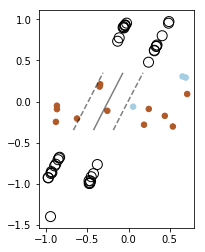

In [68]:
plot_classifier2(rbfkernal,X4,y4)